---
title: "Plotting guidelines"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

## increase fontsize to legible sizes

In [1]:
#| code-summary: "import stuff"
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Graph with default matplotlib values:

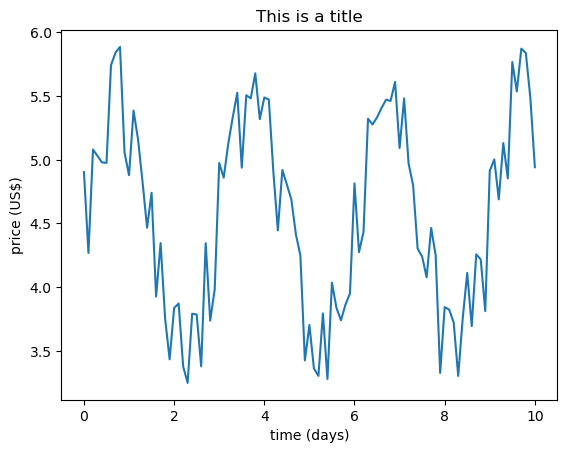

In [2]:
#| code-summary: "plot with default matplotlib values"
t = np.linspace(0, 10, 101)
y = np.sin(2.0*np.pi*t/3) + np.random.random(len(t)) + 4.0
fig, ax = plt.subplots()
ax.plot(t, y)
ax.set(title="This is a title",
       xlabel="time (days)",
       ylabel="price (US$)"
      );

You can use `seaborn` to easily change plot style and font size:

In [3]:
#| code-fold: false
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)

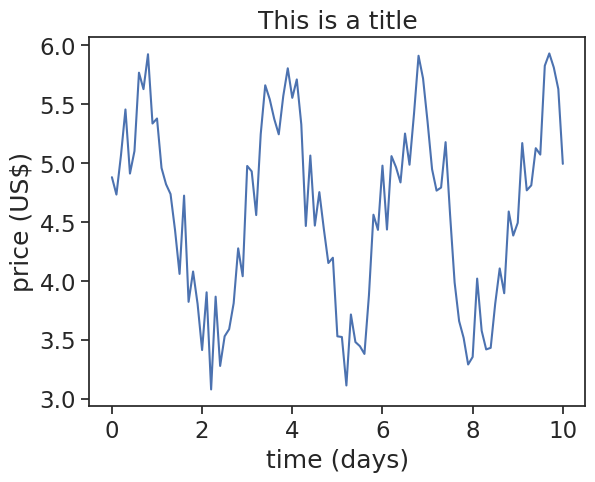

In [4]:
#| code-summary: "plot after seaborn theme changes"
t = np.linspace(0, 10, 101)
y = np.sin(2.0*np.pi*t/3) + np.random.random(len(t)) + 4.0
fig, ax = plt.subplots()
ax.plot(t, y)
ax.set(title="This is a title",
       xlabel="time (days)",
       ylabel="price (US$)"
      );

I recommend that you read seaborn's [Controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html){target="_blank"}.

## Choose colors wisely

In [5]:
#| code-summary: "define useful functions"
import math
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

When you plot with matplotlib, the default color order is the following. You can always specify a plot's color by typing something like `color="tab:red`.

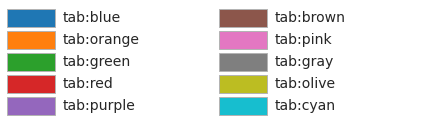

In [6]:
plot_colortable(mcolors.TABLEAU_COLORS, ncols=2, sort_colors=False);

You can write other words as color names, see below.

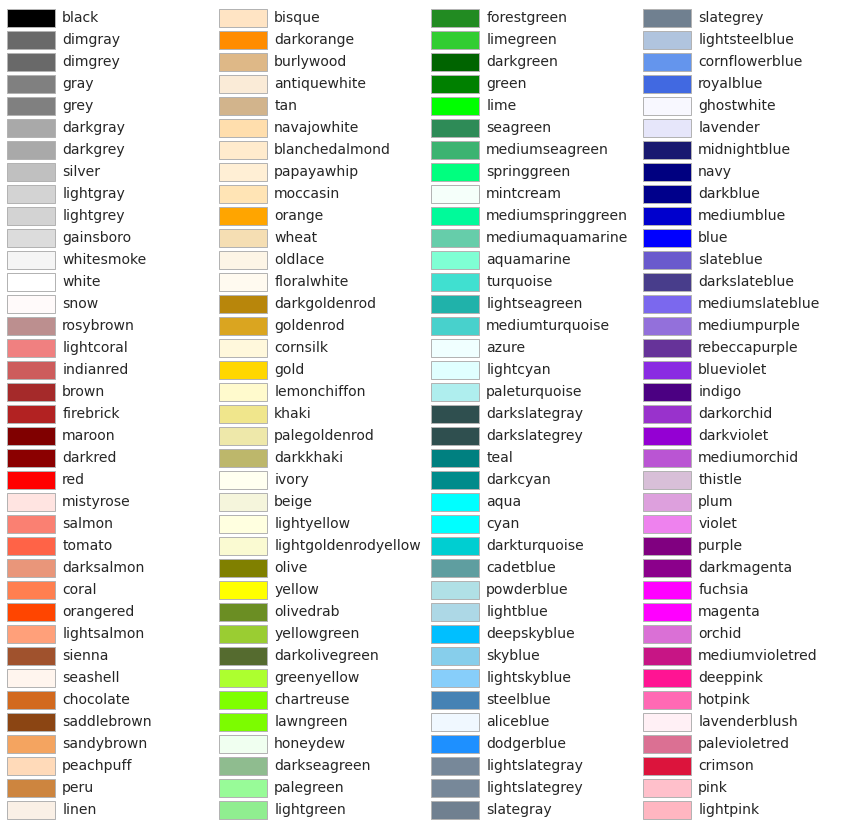

In [7]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

This reminds me of this cartoon:

![](doghouse_color_wheel_altered.jpg)

For almost all purposes, all these colors should be more than enough.

**Be consistent!**: if in one plot precipitation is blue and temperature is red, make sure you keep the same colors throughout your assignment.

**Be mindful of blind-color people**: A good rule of thumb is to avoid red and green shades in the same graph.

I'll put a bunch of links below, this is for my own reference, but you are more than welcome to take a look.

* [ColorBrewer](https://colorbrewer2.org/)
* [Palettable](https://jiffyclub.github.io/palettable/)
* [xkcd colors](https://xkcd.com/color/rgb/)
* [Colormaps in Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html)